# Random Variables

Below we illustrate some basic usage of random variables and linear operators in `probnum`. We begin by creating random variables, the primary in- and outputs of probabilistic numerical methods.

In [1]:
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [9.5, 6]
plt.rcParams['font.size'] = 18 
plt.rcParams['text.usetex'] = True

# Imports
import numpy as np
from probnum.probability import RandomVariable, Normal

# Random seed
np.random.seed(42)

## Univariate Random Variables

Instantiate and manipulate random variables and linear operators.

In [73]:
# Gaussian random variable
X = RandomVariable(distribution=Normal(mean=0, cov=1))

# Arithmetic operations between scalars and random variables
Y = 2 * X - 3
print(Y)

<() RandomVariable with dtype=<class 'float'>>


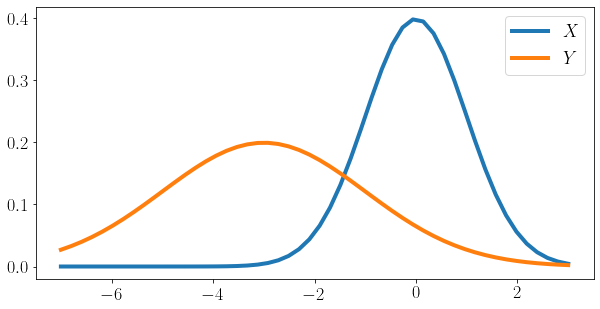

In [74]:
# Plot of probability density functions of X and Y
xx = np.linspace(-7, 3)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.plot(xx, X.distribution.pdf(xx), label="$X$", linewidth=4)
axes.plot(xx, Y.distribution.pdf(xx), label="$Y$", linewidth=4)
axes.legend()
plt.show()

## Arithmetic Operations

Perform basic arithmetic operations (addition, multiplication, ...) between scalars or vectors and random variables. You can also apply linear transformations.

### Vectors and Matrices

In [75]:
# Affine transformation of a random variable
A = np.array([[1, 2], 
              [3, 2]])
X = RandomVariable(distribution=Normal(mean=np.array([1, 2]), cov=np.array([[5, 0], 
                                                                            [0, 2]])))
Y = A @ (- X) + np.array([1, 2])
print(Y)

<(2,) RandomVariable with dtype=<class 'float'>>


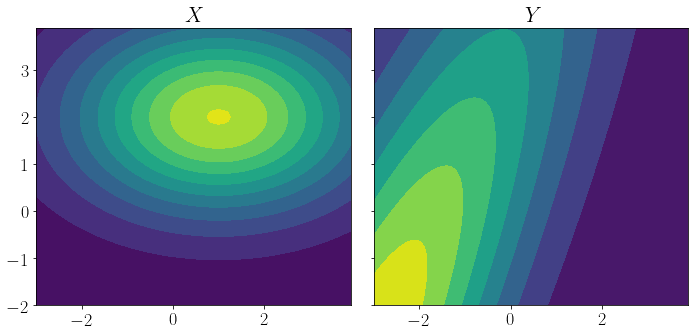

In [80]:
# Contour plot of the probability density functions of X and Y
delta = 0.1
uu = np.arange(-3, 4, delta)
vv = np.arange(-2, 4, delta)
U, V = np.meshgrid(uu, vv)
pos = np.dstack((U, V))
Z = Y.distribution.pdf(pos)

rvdict = {"$X$" : X, "$Y$" : Y}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
for i, (title, rv) in enumerate(rvdict.items()):
    axes[i].contourf(U, V, rv.distribution.pdf(pos), levels=10)
    axes[i].title.set_text(title)
plt.tight_layout()
plt.show()

### Linear Operators

In [5]:
from probnum.linalg import aslinop

# Linear operators applied to random variables
A = aslinop(np.array([[1, 2], 
                      [3, 4]]))
Y = A @ X
print(Y)

<(2,) RandomVariable with dtype=<class 'float'>>


In [6]:
Y.sample(size=(3,2))

array([[[ 4.87290569,  8.13409903],
        [13.33422164, 27.93200714]],

       [[ 9.55660383, 21.10082663],
        [ 9.97114444, 19.63827357]],

       [[-1.71353421, -3.56030951],
        [ 5.43044696,  9.98072378]]])

## Matrix-variate Random Variables

In [ ]:
# Matrix-variate normal distribution

## Linear Operators as Random Variables

In [4]:
# Linear operators _as_ random variables